<h2 align="center">TALLER 3. ANÁLISIS DE DATOS PARA CARACTERIZAR EL DESEMPEÑO DEL KART</h2>

<div style="text-align: justify"> El presente archivo muestra el desarrollo del taller 3. En este, los requerimientos se desarrollaron a manera de iteral, de tal forma que cada uno contiene las funciones y gráficas correspondientes junto con su respectivo análisis. Así, contenido del el taller 3 acerca del desempeño del kart elétrico se organiza de la siguiente manera: </div>

### <a href="#iteral1"> a) Iteral 1: Función implementada que lee los datos de un archivo VBOX </a>
### <a href="#iteral2"> b) Iteral 2: Comparación del rendimiento del vehículo de combustión interna con el kart eléctrico </a>
### <a href="#iteral3"> c) Iteral 3: Análisis de desempeño de ambos motores </a>
### <a href="#iteral4"> d) Iteral 4: Posibles mejoras al kart eléctrico para acercar su desempeño al del kart con motor de combustión interna </a>

In [1]:
# Librerias importadas para el desarrollo del taller
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
import matplotlib.gridspec as gridspec
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


<a name ="iteral1"> a) Función implementada que lee los datos de un archivo VBOX. </a>

<div style="text-align:justify"> En este iteral se presenta la función desarrollada para leer la estructura de datos en lenguaje python. Esta función se tomó directamente de los archivos de Mariana, de tal manera que únicamente se realizó una modificación en la codificación de los datos (__encoding="cp1252__). Esta codificación se realizó debido a que el archivo __.VBOX__ presenta un caracter desconocido (�) para la codificación por defecto (__utf-8__). Así, la carpeta de dirección se define como __base_dir__ y el archivo abrir como __data_file__. De esta forma, las entradas de la función son la carpeta y la dirección, mientras que la salida son los datos extraídos del archivo en una lista (datos_completos).</div>

In [2]:
def funvbox(base_dir, data_file):
    datos_completos = [()]
    with open(os.path.join(base_dir,data_file), 'r', encoding="cp1252") as vboxdata:
        section = []; time = []; lat = []; long = []; vel = []; height = []; vertv = []
        for line in vboxdata:
            if line[0] == '[':
                section = str.replace(line, "\n","")
                continue
            if section == '[column names]':
                col_names = str.replace(line, "  \n","").split('  ')
                section = []
            if section == '[data]':
                linesplit = str.replace(line, " \n","").split(' ')
                time.append(float(linesplit[1][0:2])*3600+float(linesplit[1][2:4])*60+float(linesplit[1][4:]))
                lat.append(float(linesplit[2]))
                long.append(float(linesplit[3]))
                vel.append(float(linesplit[4]))
                height.append(float(linesplit[6]))
                vertv.append(float(linesplit[7]))        
    time = np.asarray(time); lat = np.asarray(lat); long = np.asarray(long); vel = np.asarray(vel);height = np.asarray(height)
    vertv = np.asarray(vertv)
    time_base = time[0]
    time = time - time_base
    lat = lat/60.0
    long = -long/60.0
    dt = time[1]-time[0]
    
    datos_completos.append(time); datos_completos.append(lat); datos_completos.append(long)
    datos_completos.append(vel); datos_completos.append(height); datos_completos.append(vertv);
    datos_completos.append(dt)
    
    return datos_completos

<div style="text-align:justify"> Con esta función ya desarrollada, se procede a aplicarla para un archivo de datos en la carpeta Data de la librería. En el caso particular, el archivo elegido como entrada de la función para desarrollar el taller es el __VBS-047__. La razón de esto, es que este archivo era el único que presentaba datos aceptables para visualizar el comportamiento del kart eléctrico cuando da una vuelta. Esto se verificó al graficar tanto la latitud como la longitud de todos los archivos. Cabe aclarar que no se utilizó el archivo __VBS-051__ ya que este no presentaba datos. De esta manera, Estas gráficas se presentan a continuación en la figura 1:  </div>

In [3]:
# Aplicación de la función y grafica de latitud contra longitud para todos los archivos
carpeta = 'Data'
archivo_1 = 'VBS__047.VBO'; archivo_2 = 'VBS__048.VBO'; archivo_3 = 'VBS__049.VBO'; archivo_4 = 'VBS__050.VBO';
archivo_6 = 'VBS__052.VBO';
dat_archivo_1 = funvbox(carpeta, archivo_1); dat_archivo_2 = funvbox(carpeta, archivo_2);
dat_archivo_3 = funvbox(carpeta, archivo_3); dat_archivo_4 = funvbox(carpeta, archivo_4);
dat_archivo_6 = funvbox(carpeta, archivo_6);
fig, axes = plt.subplots(1, 5, figsize=(18,5))
axes[0].plot(dat_archivo_1[2], dat_archivo_1[3], '-k'); axes[0].axis('off'); axes[0].set_title("a) VBOX47")
axes[1].plot(dat_archivo_2[2], dat_archivo_2[3], '-g'); axes[1].axis('off'); axes[1].set_title("b) VBOX48")
axes[2].plot(dat_archivo_3[2], dat_archivo_3[3], '-b'); axes[2].axis('off'); axes[2].set_title("c) VBOX49")
axes[3].plot(dat_archivo_4[2], dat_archivo_4[3], '-r'); axes[3].axis('off'); axes[3].set_title("d) VBOX50")
axes[4].plot(dat_archivo_6[2], dat_archivo_6[3], '-o'); axes[4].axis('off'); axes[4].set_title("e) VBOX52")
fig.savefig('figura1', bbox_inches='tight');
plt.close()

<img style="float: center;" src="figura1.png"> </img>
<div style="text-align:center"> __Figura 1. Recorrido del Kart aparente obtenido al graficar los datos de longitud contra latitud para todos los archivos VBOX__ </div>

<div style="text-align:justify"> De esta manera, estas gráficas revelearon que efectivamente el único archivo que muestra el recorrido correcto de la pista es el primer archivo (__VBS-047__), cuya gráfica está en color negro. Para los demás archivos, se puede observar el comportamiento no se asemeja a ninguna sección de la pista, por lo cual se puede decir que hubo errores en la toma de datos o que simplemente el dispositivo se activo y/o desactivo accidentalmente. Con base en lo anterior, se desarrolló el taller con el primer archivo. </div>

<a name="iteral2"> b) Comparación del redimiento del vehículo de combustión interna con el kart eléctrico. </a>


<div style="text-align:justify"> Luego de haber importado los datos, lo siguiente es hacer la comparación del rendimiento del vehículo de combustión interna con respecto al kart elétrico. Para ello, se compararon 3 parámetros: tiempo de vuelta, velocidad instantanea y aceleración instantanea.</div>

- __Comparación de tiempos de vuelta__

<div style="text-align:justify"> Para analizar los tiempos de vuelta, lo primero es observar si los circuitos en la pista fueron los mismos. Como se puede observar en la figura 2, se puede decir que los circuitos fueron diferentes, de tal manera que el kart de Mariana tuvo un mayor recorrido que el kart eléctrico. Al igual que los archivos del elétrico, el kart de Mariana tiene archivos que no muestran el recorrido de la pista completamente o que simplemente tienen errores en los datos. Por esta razón, para graficar la figura 2 se usaron los datos del archivo __VBOX0019.VBO__. </div>

In [4]:
dat_mariana = funvbox('Data_Mariana', 'VBOX0019.VBO');
dat_archivo_1 = funvbox(carpeta, archivo_1);
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))
axes[0].plot(dat_mariana[2], dat_mariana[3], '-r'); axes[0].axis('off'); axes[0].set_title("a) Kart Mariana")
axes[1].plot(dat_archivo_1[2][345:1550], dat_archivo_1[3][345:1550], '-k'); 
axes[1].axis('off'); axes[1].set_title("b) Kart eléctrico")
fig.savefig('figura2', bbox_inches='tight');
plt.close()

<img style="float: center;" src="figura2.png"> </img>
<div style="text-align:center"> __Figura 2. Comparación de los recorridos de ambos Kart__ </div>

<div style="text-align:justify"> Con estas gráficas ya hechas, lo siguiente es obtener el tiempo por vuelta en ambos casos. En este caso, se realizará una gráfica de vuelta contra tiempo gastado para ambos casos. Debido a que la información del kart elétrico es suficiente solo para una vuelta, para las demás vueltas se asumirá constante, de tal manera que el tiempo será el mismo para todas las vueltas que realizó el kart de Mariana. Los puntos en los cuales el kart de Mariana daba una vuelta se sacaron directamente del documento de ella. Así, se muestra la figura 3: </div>  

In [5]:
tv_electrico = dat_archivo_1[1][1550]-dat_archivo_1[1][330] # Tiempo de vuelta kart eléctrico
puntos_inicio = [15690, 21260, 26770, 32260, 37750, 43220] # Puntos de ubicación en los cuales el kart se encuentra al inicio de la pista
puntos = [5570, 5510, 5490, 5490, 5470, 5500]
vueltas_mariana = 6
tv_mariana = []
t_k = []
for i in range(vueltas_mariana):
    t_k.append(tv_electrico)
    tv_mariana.append((dat_mariana[1][(puntos_inicio[1]+puntos[1])]) - (dat_mariana[1][puntos_inicio[1]]))
plt.xlabel("Vuelta")
plt.ylabel("Tiempo gastado (s)")
plt.plot(np.arange(0,vueltas_mariana,1), tv_mariana, '--r', label='Kart de combustión interna')
plt.plot(np.arange(0,vueltas_mariana,1), t_k, '--k', label='Kart eléctrico')
plt.ylim(20,70)
plt.legend(loc='lower left')
plt.savefig('figura3', bbox_inches='tight');
plt.close()

<img style="float: center;" src="figura3.png">  </img>
<div style="text-align:center"> __Figura 3. Comparación de los tiempos de vuelta de ambos Kart__ </div>

__Análisis de la gráfica:__
<p></p>
<div style="text-align:justify"> Como se puede observar, el kart de combustión interna tiene una tiempo de vuelta ligeramente menor en comparación con el kart elétrico. A pesar de que esta diferencia sea pequeña, hay que recordar que los carros no recorrieron el mismo circuito, de tal manera que el kart de combustión interna realizó un recorrido más largo. Por esta razón, es posible decir que el kart de Mariana es mucho más rápido que el eléctrico. En este caso los puntos utilizados para saber cuando el kart da una vuelta se sacaron directamente del documento de Mariana, de tal manera que todas las vueltas se dieron en 59 segundos aproximadamente. </div>

- __Comparación de velocidades instantaneas__

<div style="text-align:justify"> Luego de haber obtenido los tiempos de vuelta, lo siguiente a realizar es las gráficas de velocidades instantáneas. Debido a que los carros tienen diferentes velocidad en tiempos diferentes, para realizar una mejor comparación se grafican los datos como si iniciaran desde cero. En otras palabras, se grafican ambas velocidades como si los dos kart arrancaran al mismo tiempo al inicio de la pista. Así, se obtiene la figura 4. </div>

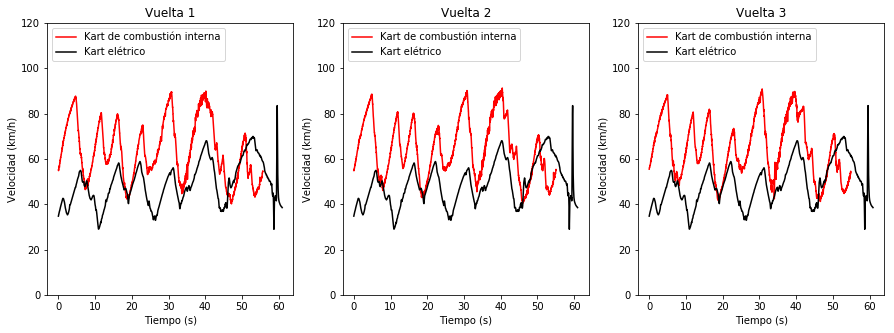

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig1, axes1 = plt.subplots(1, 2, figsize=(15,5))
for i in range(vueltas_mariana):
    if i<=2:
        axes[i].plot((dat_mariana[1][(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]- dat_mariana[1][puntos_inicio[i]]),
                 dat_mariana[4][(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]  ,'-r', label='Kart de combustión interna');
        axes[i].plot((dat_archivo_1[1][330:1550]-dat_archivo_1[1][330]), dat_archivo_1[4][330:1550]  ,'-k', label='Kart elétrico');
        axes[i].set_title(f"Vuelta {i+1}")
        axes[i].set_xlabel("Tiempo (s)")
        axes[i].set_ylabel("Velocidad (km/h)")
        axes[i].legend(loc='upper left')
        axes[i].set_ylim(0,120)
    else:
        axes1[i-3].plot((dat_mariana[1][(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]- dat_mariana[1][puntos_inicio[i]]),
                 dat_mariana[4][(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]  ,'-r', label='Kart de combustión interna');
        axes1[i-3].plot((dat_archivo_1[1][330:1550]-dat_archivo_1[1][330]), dat_archivo_1[4][330:1550]  ,'-k', label='Kart elétrico');
        axes1[i-3].set_title(f"Vuelta {i+1}")
        axes1[i-3].set_xlabel("Tiempo (s)")
        axes1[i-3].set_ylabel("Velocidad (km/h)")
        axes1[i-3].legend(loc='upper left')
        axes1[i-3].set_ylim(0,120)
    if i>=4:
        break       
plt.savefig('figura4', bbox_inches='tight');
plt.close()


<img style="float: center;" src="figura4.png"> </img>
<p> </p>
<div style="text-align:center"> __Figura 4. Comparación de las velocidades instantaneas de ambos Kart__ </div>

<div style="text-align:justify"> __Análisis de la gráfica:__ Tal como se dijo en el análisis anterior, el kart de combustión interna tiene una velocidad cercana al doble en todo momento, principalmente debido a que el poder calorífico producido por la gasolina genera un torque mayor al que puede producir el kart elétrico. Además de esto, se puede observar que al final de todas las gráficas, la velocidad del kart eléctrico aumenta desproporcionadamente antes de terminar una vuelta, lo cual puede representar un error porque la aceleración para alcanzar dicha velocidad no puede ser desarrollada por este tipo de kart. Finalmente, se puede observar que la gráfica de velocidad del kart de Mariana termina un poco antes, lo cual significia que este dio la vuelta primero. </div>

- __Comparación de aceleraciones__

<div style="text-align:justify"> Luego de haber comparado el desempeño de ambos kart en términos de velocidad, lo siguiente es hacer la comparación en términos de aceleración. De la misma manera como se realizaron las anteriores gráficas, se procede a plotear la aceleración de las 5 vueltas. Así, se obtiene la figura 5. Para obtener la aceleración se utilizó directamente la función __accel__ de la documentación de Mariana. </div>

In [7]:
def accel(vx, ddt):
    return ndimage.gaussian_filter1d(vx, sigma=20, order=1, mode='wrap')/ddt

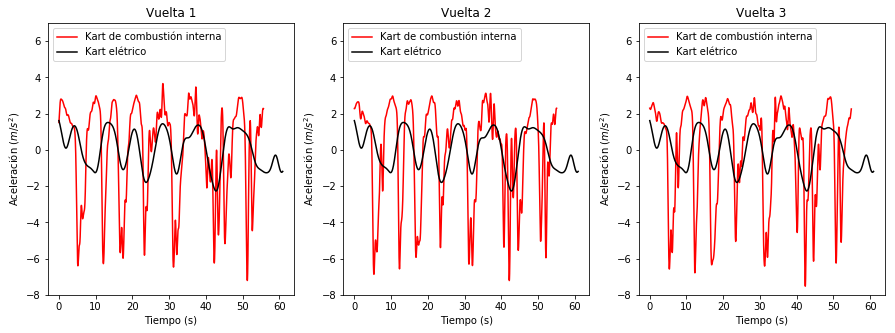

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig1, axes1 = plt.subplots(1, 2, figsize=(15,5))
for i in range(vueltas_mariana):
    if i<=2:
        acx_electrico = accel(dat_archivo_1[4]/3.6 ,dat_archivo_1[7])
        acx_mariana = accel(dat_mariana[4]/3.6, dat_mariana[7])
        axes[i].plot((dat_mariana[1][(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]- dat_mariana[1][puntos_inicio[i]]),
                 acx_mariana[(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]  ,'-r', label='Kart de combustión interna');
        axes[i].plot((dat_archivo_1[1][330:1550]-dat_archivo_1[1][330]), acx_electrico[330:1550]  ,'-k', label='Kart elétrico');
        axes[i].set_title(f"Vuelta {i+1}")
        axes[i].set_xlabel("Tiempo (s)")
        axes[i].set_ylabel("Aceleración ($m/s^{2}$)")
        axes[i].legend(loc='upper left')
        axes[i].set_ylim(-8,7)
    else:
        axes1[i-3].plot((dat_mariana[1][(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]- dat_mariana[1][puntos_inicio[i]]),
                 acx_mariana[(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))] ,'-r', label='Kart de combustión interna');
        axes1[i-3].plot((dat_archivo_1[1][330:1550]-dat_archivo_1[1][330]), acx_electrico[330:1550]  ,'-k', label='Kart elétrico');
        axes1[i-3].set_title(f"Vuelta {i+1}")
        axes1[i-3].set_xlabel("Tiempo (s)")
        axes1[i-3].set_ylabel("Aceleración ($m/s^{2}$)")
        axes1[i-3].legend(loc='upper left')
        axes1[i-3].set_ylim(-8,7)
    if i>=4:
        break       
plt.savefig('figura5', bbox_inches='tight');
plt.close()


<img style="float: center;" src="figura5.png"> </img>
<p> </p>
<div style="text-align:center"> __Figura 5. Comparación de las aceleraciones de ambos kart __ </div>

<div style="text-align:justify"> __Análisis de gráfica:__ Luego de haber obtenido los datos de aceleración con el filtro desarrollado en la función __accel__ (el cual deriva la velocidad con respecto al tiempo), es posible observar una mayor aceleración en el kart de combustión interna con respecto al kart eléctrico, debido a que el torque que da el motor del kart de Mariana es mayor (tanto aceleración como frenado). </div>


<a name="iteral3"> c) Análisis del desempeño de ambos motores </a>

<div style="text-align:justify"> Luego de haber evaluado el rendimiento de los vehículos en parámetros dinámicos, lo siguiente es evaluar el rendimiento de ambos tipos de motores. Así, los parámetros para evaluar los rendimientos son los siguientes: comparación del momento par, comparación de potencia y comparación de velocidad de giro. Antes de evaluar estos parámetros, es necesario ingresar los datos del kart nuevamente (datos del __Taller 2__). </div>
   

- __Datos del kart eléctrico__

In [9]:
# Datos Llantas tractivas 
rll=0.139 # Radio geométrico de las llantas en traseras (m)
refc=0.98*rll # Radio efectivo llantas traseras (m)
rin=0.0631 #radio interno del neumático (m)

# Datos Transmisión
dp=11.0 # Dientes del piñon
dpl=39.0 # Dientes del plato
ng=dpl/dp # Relación de Transmisión
etaf=0.95 # Eficiencia de transmisión

# Datos eje llantas
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)

# Datos Kart general
masa=152.0 # masa del Kart (kg)
g=9.81 # Gravedad (m/s)
w=masa*g # peso del Kart (N)

# Datos Fuerzas de la fórmula de aceleración
rho=1.1955 # densidad del aire (kg/m^3)
dll=0.975 # Distancia entre ejes de llantas delanteras (m)
alj=0.88 # Altura con el piloto sentado en el kart (estatura 1.68 m) (m)
af=(dll*alj)/2 # Area Frontal Kart (m^2)
cd=0.89 # Coeficiente de Arrastre Kart
vw=0.0 # velocidad del viento (m/s)
theta=0.0 # Angulo carretera

# Inercias
ii=5.2E-3 # Inercia motor de combustión (kg m^2) 

mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)

#paso=7.62 #(mm)
#rpim= paso*(0.6+(1/tan(180/dp))) # Radio Piñon (mm)
#rplam=paso*(0.6+(1/tan(180/dpl))) # Radio Plato (mm)
#rpi= rpim/1000 #Radio Piñon (m)
#rpla= rplam/1000 #Radio Plato (m)
rpi=0.01525#(m)
rpla=0.04096 #(m)
rhoac=7850.0 # Densidad del Acero (kg/m^3)
bpi=0.01 # Ancho piñon (m)
bpla=0.02 # Ancho plato (m)
vpi= bpi*np.pi*rpi**2 # Volumen del piñon (m^3)
vpla=bpla*np.pi*rpla**2 # Volumen del plato (m^3)
mpi=rhoac*vpi # Masa del piñon (kg)
mpla=rhoac*vpla # Masa del plato (kg)
ig=((mpi*(rpi**2))/2.0)+((mpla*(rpla**2))/2.0) # Inercia de la transmisión (kg-m^2)

ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)

# Fuerzas Aceleración
# Resistencia a la rodadura
a=0.2231 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.07478 # Altura del centro de gravedad del kart con respecto al piso (m)

- __ Comparación del momento par__

<div style="text-align:justify" > Luego de tener los datos a ingresar, es necesario definir nuevamente las fuerzas que soporta el kart para hallar el torque (funciones del taller 2). Así, para hallar el torque se ingresan las de fuerza de frodadura, fuerza de inclinación, fuerza de arrastre, fuerza de tracción y torque de motor. </div>

In [10]:
# Función para calcular la fuerza de rodadura
def frodadura(vx,ax):
    wr=w*((a/l)+(ax/g*(h/l))) # fuerza vertical sobre las llantas tractivas
    fr=0.01*(1+(vx/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)
    # fr=C*((mllt*g)/(rllt*2))*sqrt(ht/bllt)
    # ht=0.0739 # Altura del neumático (m)
    # bllt=0.209 # Ancho del neumático (m)
    # C= # Constante del material de la llanta
    return wr*fr*cos(theta) # (N)
# Función para calcular la fuerza del ángulo de la carretera
def finclinacion(theta):
    return w*sin(theta)
# Función para calcular la fuerza de arrastre
def farrastre(vx):
    return (1.0/2.0)*rho*af*cd*(vx+vw)**2
# Fuerza de tracción, Torque del Motor
def ftraccion(ax,Fg,Fw,Fr):
    # Ft=((ti*ng*etaf)/refc)-(((ii-ig)*ng^2)+ieje+illd*2+illt*2)*(ax/(refc^2)) # (N)
    return masa*ax+Fg+Fw+Fr
def torquemotor(ax,Ft):
    return (Ft+(((ii-ig)/(ng**2))+ieje+illd*2+illt*2)*(ax/(refc**2)))*(refc/(ng*etaf)) # Torque del motor (Nm)

def dveldt(velv,t0):
    xx,vel = velv
    omega_llanta = vel*ng/refc
    omega_motor = omega_llanta
    frod = frodadura_const(vel*3.6)       
    farr = farrastre(vel)
    fincli = finclinacion(theta)
    return [vel,((torquemotor_curva(omega_motor)*ng*etaf/refc)-frod-farr-fincli)/masa_eq]

<div style="text-align:justify" > Con estas funciones ya definidas, se procede a calcular tanto la fuerza como el torque del motor. De esta manera, se obtiene lo siguiente: </div>

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
for i in range(2):
    # Fuerza kart Mariana
    finc = finclinacion(theta)
    farr = farrastre(dat_mariana[4][puntos_inicio[i]:(puntos_inicio[i]+puntos[i])])
    frod = frodadura(dat_mariana[4][puntos_inicio[i]:(puntos_inicio[i]+puntos[i])],
                    acx_mariana[(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]);
    ftrac = ftraccion(acx_mariana[(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))],finc,farr,frod)
    torque = torquemotor(acx_mariana[(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))],ftrac)
    # Fuerza en kart eléctrico
    finc_ele = finclinacion(theta)
    farr_ele = farrastre(dat_archivo_1[4][330:1550])
    frod_ele = frodadura(dat_archivo_1[4][330:1550], acx_electrico[330:1550]);
    ftrac_ele = ftraccion(acx_electrico[330:1550], finc_ele,farr_ele,frod_ele)
    torque_ele = torquemotor(acx_electrico[330:1550], ftrac_ele)
    
    axes[i].plot((dat_mariana[1][(puntos_inicio[i]):((puntos_inicio[i]+puntos[i]))]- dat_mariana[1][puntos_inicio[i]]),
                 torque  ,'-r', label='Kart de combustión interna');
    axes[i].plot((dat_archivo_1[1][330:1550]-dat_archivo_1[1][330]), torque_ele ,'-k', label='Kart elétrico');
    axes[i].set_title(f"Vuelta {i+1}")
    axes[i].set_xlabel("Tiempo (s)")
    axes[i].set_ylabel("Torque (Nm)")
    axes[i].legend(loc='upper left')
    axes[i].set_ylim(-20,100)

plt.savefig('figura6', bbox_inches='tight');
plt.close()


<img style="float: center;" src="figura6.png">  </img>
<p> </p>
<div style="text-align:center"> __Figura 6. Comparación de las aceleraciones de ambos kart __ </div>

- __ Análisis de gráfica__

- __Comparación de potencia__

- __Comparación de velocidad de giro__

<a name="iteral4" > d) Posibles mejoras al kart eléctrico para acercar su desempeño al del kart con motor de combustión interna </a>